In [ ]:
#Mount the drive as the images will be imported from the drive

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [1]:
#Need to install these two libraries 

!pip install mtcnn
!pip install tensorflow_hub

     |████████████████████████████████| 2.3 MB 8.2 MB/s 


In [2]:
#Import the neccessary libraries

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import keras,os
from keras.layers import Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization ,Activation
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN
import cv2
from cv2 import imread
import numpy as np
from tqdm import tqdm
import os
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input
from google.colab.patches import cv2_imshow
from moviepy.editor import *
import pandas as pd
import io
#from google.colab.output import eval_js
#from base64 import b64decode, b64encode
import PIL
import sklearn.metrics as metrics
from keras.models import load_model
from sklearn.utils import shuffle
import random
from random import randint
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.applications.vgg16 import VGG16



Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3424256/45929032 bytes (7.5%)7544832/45929032 bytes (16.4%)11354112/45929032 bytes (24.7%)15605760/45929032 bytes (34.0%)19554304/45929032 bytes (42.6%)23453696/45929032 bytes (51.1%)27607040/45929032 bytes (60.1%)31842304/45929032 bytes (69.3%)35971072/45929032 bytes (78.3%)40067072/45929032 bytes (87.2%)44187648/45929032 bytes (96.2%)45929032/45929032 bytes (100.0%)
  Done
File saved as /root

faces_path = '/content/drive/MyDrive/Dataset/Faces'

In [3]:
#Path of the Faces Dataset

Happy = '/content/drive/MyDrive/Dataset/Faces2/Happy'
Fear = '/content/drive/MyDrive/Dataset/Faces2/Fear'
Neutral = '/content/drive/MyDrive/Dataset/Faces2/Neutral'
Sad = '/content/drive/MyDrive/Dataset/Faces2/Sad'
Angry = '/content/drive/MyDrive/Dataset/Faces2/Angry'
detector = MTCNN()


In [4]:
#Function for importing inn the dataset

def create_dataset(directory,label_name):
    for i in tqdm(os.listdir(directory)):
        full_path = os.path.join(directory,i)
        try:
            img = cv2.imread(full_path)
            img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        except:
            continue
        x.append(img)
        y.append(label_name)
    return x,y

In [5]:
#import inn the faces


x =[]
y =[]
x,y = create_dataset(Happy,"Happy")
x,y = create_dataset(Fear,"Fear")
x,y= create_dataset(Neutral,"Neutral")
x,y= create_dataset(Sad,"Sad")
x,y = create_dataset(Angry,"Angry")
print("")
x1 = np.array(x)
y1 = np.array(y)


100%|██████████| 342/342 [01:43<00:00,  3.31it/s]


In [6]:
#Use MTCNN to only focus on the faces and resize it to 150 x 150

faces = []
labels = []
def draw_faces(images, ys):
    #data = plt.imread(images)
    for i in range(len(images)):
        data = images[i]
        label = ys[i]
        result_list = detector.detect_faces(data)
        x2,y2,width,height = result_list[0]['box']
        x3, y3 = x2 + width, y2+ height
        #plt.subplot(1,len(result_list),i+1)
        plt.axis('off')
        number = -10
        plt.imshow(data[y2-number:y3+number,x2-number:x3+number])
        image = cv2.resize(data[y2-number:y3+number, x2-number:x3+number], (150,150))
        faces.append(image)
        labels.append(label)
    return faces,labels

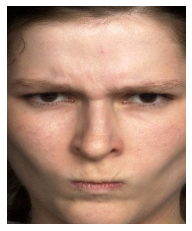

In [7]:
faces, labels = draw_faces(x1,y1)

In [8]:
faces = np.array(faces)
labels = np.array(labels)
print(faces.shape,labels.shape)

(1710, 150, 150, 3) (1710,)


5
409
817
1225
1633


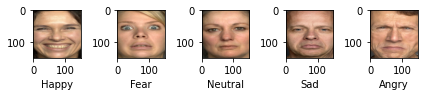

In [22]:
for i in range(5):
  #random = random.randint(0,1710)
  plt.subplot(1,5,i+1)
  if i == 0:
    number = 405*i+5
  else:
    number = 408*i+1 
  #print(number)
  plt.imshow(faces[number])
  plt.xlabel(labels[number])
plt.tight_layout()
  

(1710, 150, 150, 3) (1710,)


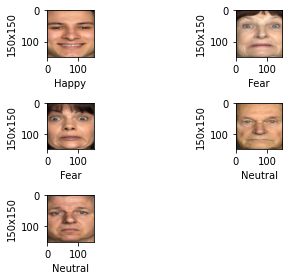

In [23]:
x1, y1 = faces,labels
x1 = np.array(x1)
y1 = np.array(y1)
print(faces.shape,y1.shape)
for i in range(5):
    number = (i+1)*200
    #if i == 3:
    #  number = 53
    plt.subplot(3,2,i+1)
    #print(number)
    plt.imshow(x1[number])
    plt.ylabel("150x150")
    plt.xlabel(y1[number])
    

plt.tight_layout()
plt.show()

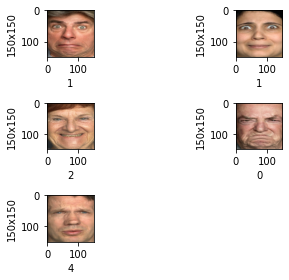

In [24]:
y1 = labelencoder.fit_transform(y1)
new_x, new_y = shuffle(x1,y1)
x1 = new_x
y1 = new_y
for i in range(5):
    number = (i+1)*15
    #if i == 3:
    #  number = 53
    plt.subplot(3,2,i+1)
    #print(number)
    plt.imshow(x1[number])
    plt.ylabel("150x150")
    plt.xlabel(y1[number])
    

plt.tight_layout()
plt.show()

## Labels = 
Angry - 0, Fear - 1, Happy - 2, Neutral - 3, Sad - 4. 

In [25]:
#ImageDataGenerator === IDG
#Image augmentation function in this cell
x = np.array(x1)
y = np.array(y1)
aug = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True,rotation_range = 10, 
                         width_shift_range= 0.1, height_shift_range= 0.1,shear_range = 0.1,
                         horizontal_flip = True,fill_mode = 'nearest',brightness_range=[0.7,1.0],
                         zoom_range=[0.5,1.0])
length = len(x)
#length = len(k)
#x = x.flatten().reshape(length,224,224,3)
x = x.flatten().reshape(length,150,150,3)
x1 = x
#y1 = y
print('The length of the dataset (images) is now', len(x1))
print('The length of the dataset (labels) is now', len(y1))
def imgaug(indexnumber):
  #Find out the indexnumber
  global x1
  global y1
  x1 = x1.flatten().reshape(len(x1),150,150,3)  #x1 is reshaped here to 4D for augmentation
  x_aug = np.expand_dims(x1[indexnumber],0)   #x_aug = x1 expand the dimension
  y_aug = y1[indexnumber]                     #This will be the label
  aug_iter = aug.flow(x_aug)                  #aug flow is called in from function IDG
  aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range (10)] #Images gets created here, 10 each
  #plots(aug_images,rows= 2)                   #plot the images with 2 rows
  aug_images = np.array(aug_images)           #Convert the list to array
  #print(type(aug_images))                     #
  aug_images = aug_images.flatten().reshape(10,67500) #reshape it 
  x1 = x1.flatten().reshape(len(x1),67500)     #flatten it here
  x1 = np.concatenate((x1, aug_images))       #Add it to the arrray
  #print(y1[indexnumber])                      #append labels accordingly
  for i in range(len(aug_images)):
    if y1[indexnumber] == 1:
      y1 = np.append(y1,1)
    elif y1[indexnumber] == 2:
      y1 = np.append(y1,2)
    elif y1[indexnumber] == 3:
      y1 = np.append(y1,3)
    elif y1[indexnumber] == 4:
      y1 = np.append(y1,4)
    elif y1[indexnumber] == 5:
      y1 = np.append(y1,5)
    elif y1[indexnumber] == 6:
      y1 = np.append(y1,6)
    elif y1[indexnumber] == 7:
      y1 = np.append(y1,7)    
    elif y1[indexnumber] == 0:
      y1 = np.append(y1,0)

The length of the dataset (images) is now 1710
The length of the dataset (labels) is now 1710


In [26]:
print('Here is the data stored before augmentation')
print(' ')

print('Additional data will be added here: ')
for i in range(len(x1)):
  if i % 3762 == 0:
    print('Still working......')
  imgaug(i)

print('Final outcome is ', x1.shape,y1.shape)

Here is the data stored before augmentation
 
Additional data will be added here: 
Still working......
Final outcome is  (18810, 67500) (18810,)


Happy appered  3762
Happy appered  3762
Happy appered  3762
Happy appered  3762
Happy appered  3762


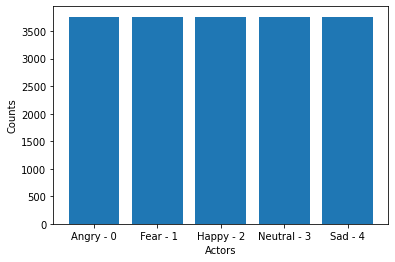

In total there are 18810  images ready


In [27]:
labels1 = ['Angry', 'Fear', 'Happy', 'Neutral', 'Sad']
labels1 = np.array(labels)
for i in range(5):
  occurrences = np.count_nonzero(y1 == i)
  print(labels1[i], 'appered ', occurrences)
distribution_train = {"Angry - 0": np.count_nonzero(y1 == 0)," Fear - 1":np.count_nonzero(y1 == 1),"Happy - 2":np.count_nonzero(y1 == 2),"Neutral - 3":np.count_nonzero(y1 == 3),"Sad - 4":np.count_nonzero(y1 == 4)}#,"5":np.count_nonzero(y1 == 5),"6": np.count_nonzero(y1 == 6),"7": np.count_nonzero(y1 == 7)}
plt.bar(list(distribution_train.keys()),list(distribution_train.values()),width =0.8)
plt.xlabel('Actors')
plt.ylabel('Counts')
plt.show()
print('In total there are',sum(distribution_train.values()), ' images ready' )

18810 18810


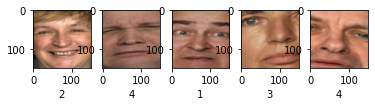

In [28]:
#Shuffle the data such that the model gets good training 

new_x, new_y = shuffle(x1,y1)
x,y = new_x,new_y

for i in range(5):
  number = randint(0,len(x1))
  image = x1[number].reshape(150,150,3)
  plt.subplot(1,5,i+1)
  plt.imshow(image)
  plt.xlabel(y1[number])


In [29]:
arr = []
for i in range(len(x1)):
    image = x1[i].reshape(150,150,3)
    arr.append(image)
arr = np.array(arr)
x = arr
y = y1
print(x.shape,y.shape)

(18810, 150, 150, 3) (18810,)


In [30]:
print("Training set")
X_train, X_val, y_train,y_val = train_test_split(x,y,test_size = 1/10, random_state = 12)
print(X_train.shape)
#print(y_train)
print(" ")
print("Validation and Test set")
X_val, X_test, y_val, y_test = train_test_split(X_val,y_val,test_size = 1/2, random_state = 12)
print(X_val.shape,X_test.shape)
#print(y_val,y_test)

Training set
(16929, 150, 150, 3)
 
Validation and Test set
(940, 150, 150, 3) (941, 150, 150, 3)


In [31]:
# normalize data
X_train = X_train.astype('float32') / 255.
X_val = X_val.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [32]:
#Summary
(unique, counts) = np.unique(y, return_counts=True)
print("In total there was ", len(x), " images from 5 classes") 
print("train / validation / test split: %d, %d, %d"%(len(X_train), len(X_val), len(X_test)))
print("training data shape: ", X_train.shape)
print("training labels shape: ", y_train.shape)

In total there was  18810  images from 5 classes
train / validation / test split: 16929, 940, 941
training data shape:  (16929, 150, 150, 3)
training labels shape:  (16929,)


#VGG16

In [33]:
vgg = VGG16(weights="imagenet",include_top=False, input_shape=(150,150,3))
#vgg.summary(line_length=150)
flatten = Flatten()
new_layer2 = Dense(5, activation='softmax', name='Output_Layer')

#Adding the input and output layers
inp2 = vgg.input
out2 = new_layer2(flatten(vgg.output))
model2 = Model(inp2, out2)
#model2.summary(line_length=150)

# make all layers untrainable by freezing weights (except for last layer)
#in such a way the weights from imagenet can be in good use

for l, layer in enumerate(model2.layers[:-1]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model2.layers[-1:]):
    layer.trainable = True

model2.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#model2.summary()

58900480/58889256 [==============================] - 0s 0us/step


In [34]:
#train the model 

history = model2.fit(X_train, y_train, 
                         batch_size=50, 
                         epochs=10, 
                         validation_data=(X_val, y_val))

Epoch 1/10
339/339 [==============================] - 27s 71ms/step - loss: 0.5413 - accuracy: 0.8090 - val_loss: 0.3654 - val_accuracy: 0.8702
Epoch 2/10
339/339 [==============================] - 21s 61ms/step - loss: 0.3027 - accuracy: 0.8982 - val_loss: 0.2709 - val_accuracy: 0.9160
Epoch 3/10
339/339 [==============================] - 21s 61ms/step - loss: 0.2337 - accuracy: 0.9237 - val_loss: 0.2279 - val_accuracy: 0.9223
Epoch 4/10
339/339 [==============================] - 21s 61ms/step - loss: 0.1961 - accuracy: 0.9380 - val_loss: 0.1994 - val_accuracy: 0.9351
Epoch 5/10
339/339 [==============================] - 21s 61ms/step - loss: 0.1684 - accuracy: 0.9501 - val_loss: 0.1883 - val_accuracy: 0.9404
Epoch 6/10
339/339 [==============================] - 21s 61ms/step - loss: 0.1494 - accuracy: 0.9556 - val_loss: 0.1918 - val_accuracy: 0.9372
Epoch 7/10
339/339 [==============================] - 21s 61ms/step - loss: 0.1354 - accuracy: 0.9595 - val_loss: 0.1526 - val_accuracy:

#Performance Evaluation

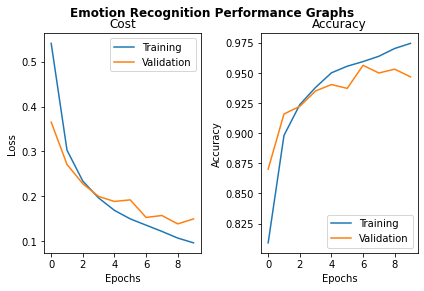

In [35]:
fig = plt.figure()
  
#fig.suptitle("Face Recognition Performance Graphs")
ax = fig.add_subplot(1,2,1)
ax.set_title("Cost")
ax.plot(history.history['loss'], label="Training")
ax.plot(history.history['val_loss'],label="Validation")
ax.set_ylabel('Loss')
ax.set_xlabel('Epochs')
ax.legend()

ax = fig.add_subplot(1,2,2)
ax.set_title("Accuracy")
ax.plot(history.history['accuracy'], label="Training")
ax.plot(history.history['val_accuracy'],label="Validation")
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epochs')
ax.legend()
fig.suptitle("Emotion Recognition Performance Graphs", y=1,fontweight='bold')
fig.tight_layout()
plt.show()

Test loss: 0.17476829886436462
Test accuracy: 0.935175359249115


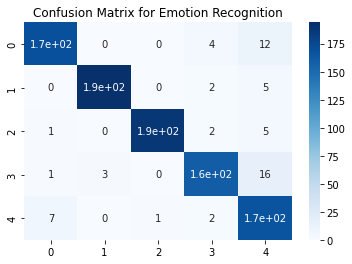

In [37]:
#loss and accuracy of the model based on test set


loss, accuracy = model2.evaluate(X_test, y_test, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)
predictions = model2.predict(X_test)
a = np.argmax(predictions,axis=1)

predictions = model2.predict(X_test)
a = np.argmax(predictions,axis=1)
cf_matrix = confusion_matrix(y_test, a)
ax = plt.axes()
sns.heatmap(cf_matrix, annot=True,  cmap='Blues')
ax.set_title('Confusion Matrix for Emotion Recognition')
plt.show()

In [38]:
#classification report of the models performance

from sklearn.metrics import classification_report

#Classification report is used here!
print('Classification Report')
print(classification_report(a,y_test))

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       179
           1       0.97      0.98      0.97       197
           2       0.96      0.99      0.98       189
           3       0.89      0.94      0.91       170
           4       0.94      0.82      0.87       206

    accuracy                           0.94       941
   macro avg       0.93      0.94      0.93       941
weighted avg       0.94      0.94      0.93       941



In [39]:
model2.save("Emotion_Rec_Model.h5")

In [40]:
from google.colab import files
files.download('Emotion_Rec_Model.h5') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
model_new = load_model('Emotion_Rec_Model.h5')
model_new.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   